### Collaborative - Jacob

In [1]:
import pandas as pd

# Load the datasets
df_articles = pd.read_csv('shared_articles.csv')
df_triple = pd.read_csv('users_interactions.csv')

# Display results
display(df_articles.head())
display(df_triple.head())

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN


In [2]:
# --------------------------
# Clean df_articles
# --------------------------

# Sort by timestamp so the most recent events are first
df_articles_sorted = df_articles.sort_values(by='timestamp', ascending=False)

# Get the most recent event per contentId
latest_events = df_articles_sorted.drop_duplicates(subset='contentId', keep='first')

# Keep only contentIds where the most recent event is CONTENT SHARED
valid_content_ids = latest_events[latest_events['eventType'] == 'CONTENT SHARED']['contentId']

# Get the most recent CONTENT SHARED record per contentId
df_articles_shared = df_articles[
    (df_articles['contentId'].isin(valid_content_ids)) &
    (df_articles['eventType'] == 'CONTENT SHARED')
]

df_articles_clean = df_articles_shared.sort_values(by='timestamp', ascending=False) \
    .drop_duplicates(subset='contentId', keep='first') \
    [['contentId', 'title', 'url']] \
    .drop_duplicates()

# --------------------------
# Clean df_triple
# --------------------------

# Keep only relevant columns and drop duplicates
df_triple_clean = df_triple[['personId', 'contentId', 'eventType', 'timestamp']].drop_duplicates()

# Relabel eventType to numeric ordinal ratings
event_type_mapping = {
    'VIEW': 1,
    'LIKE': 2,
    'FOLLOW': 3,
    'BOOKMARK': 4,
    'COMMENT CREATED': 5
}
df_triple_clean['eventType'] = df_triple_clean['eventType'].map(event_type_mapping)

# Only keep rows where contentId matches cleaned articles
df_triple_clean = df_triple_clean[df_triple_clean['contentId'].isin(df_articles_clean['contentId'])]

# Keep the highest engagement per (personId, contentId)
df_triple_clean = df_triple_clean.sort_values(by='eventType', ascending=False) \
    .drop_duplicates(subset=['personId', 'contentId'], keep='first')

# Rename for consistency
df_articles = df_articles_clean
df_triple = df_triple_clean

# --------------------------
# Display final cleaned data
# --------------------------
display(df_articles.head())
display(df_triple.head())

,contentId,title,url
3121,4109618890343020064,The 2017 Acquia Partners of the Year,https://www.acquia.com/blog/partner/2017-acqui...
3120,6607431762270322325,JPMorgan Software Does in Seconds What Took La...,https://www.bloomberg.com/news/articles/2017-0...
3119,3618271604906293310,Code.org 2016 Annual Report,https://code.org/about/2016
3118,-3295913657316686039,Amazon takes on Skype and GoToMeeting with its...,https://thenextweb.com/apps/2017/02/14/amazon-...
3117,9213260650272029784,"Conheça a Liga IoT, plataforma de inovação abe...",https://startupi.com.br/2017/02/liga-ventures-...


,personId,contentId,eventType,timestamp
7393,-1443636648652872475,2858969450431709251,5,1464028408
71944,2416280733544962613,5930806521893160184,5,1484356711
71949,3609194402293569455,-2386148284399181873,5,1484911614
5103,-1578287561410088674,-1453783314552286835,5,1463890509
72155,3938645257702379823,-3900870368325485697,5,1485427731


<Axes: xlabel='eventType', ylabel='Count'>

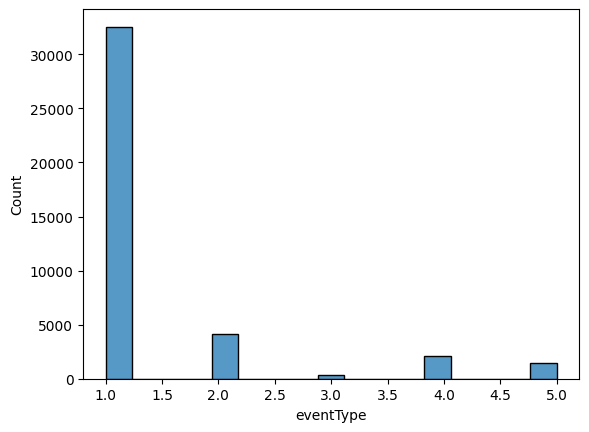

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_triple, x="eventType")

In [4]:
print(f"Number of ratings: {df_triple.shape[0]}")
print(f"Number of articles: {df_triple.contentId.nunique()}")
print(f"Number of users: {df_triple.personId.nunique()}")

Number of ratings: 40486
Number of articles: 2918
Number of users: 1894


In [5]:
df_triple.contentId.value_counts()

contentId
-4029704725707465084    268
-6783772548752091658    193
-133139342397538859     193
 7507067965574797372    149
-8208801367848627943    145
                       ... 
-2976309714446243509      1
 7697593937932606048      1
-7108012586837980940      1
-6468782714472551646      1
-9040419159428373932      1
Name: count, Length: 2918, dtype: int64

In [6]:
print('Min:\t\t', df_triple['contentId'].value_counts().min())
print('Quartile 1:\t', df_triple['contentId'].value_counts().quantile(.25))
print('Median:\t\t', df_triple['contentId'].value_counts().quantile(.5))
print('Quartile 3:\t', df_triple['contentId'].value_counts().quantile(.75))
print('Max:\t\t', df_triple['contentId'].value_counts().max())

Min:		 1
Quartile 1:	 4.0
Median:		 9.0
Quartile 3:	 17.0
Max:		 268


In [7]:
value_counts = df_triple.contentId.value_counts()
keep_list = value_counts[value_counts >= 9]
df_triple = df_triple.loc[df_triple['contentId'].isin(keep_list.index)]

In [8]:
def create_matrix(df, user, item, rating):
    import numpy as np
    from scipy.sparse import csr_matrix
    
    U = df[user].nunique()  # Number of users for the matrix
    I = df[item].nunique()  # Number of items for the matrix
    
    # Map person and content IDs to matrix indices
    user_mapper = dict(zip(np.unique(df[user]), list(range(U))))
    item_mapper = dict(zip(np.unique(df[item]), list(range(I))))
    
    # Map matrix indices back to IDs
    user_inv_mapper = dict(zip(list(range(U)), np.unique(df[user])))
    item_inv_mapper = dict(zip(list(range(I)), np.unique(df[item])))
    
    # Create a list of index values for the csr_matrix for people and content
    user_index = [user_mapper[i] for i in df[user]]
    item_index = [item_mapper[i] for i in df[item]]
    
    # Build the final matrix which will look like: (contentId, personId) eventType
    X = csr_matrix((df[rating], (item_index, user_index)), shape=(I, U))
    
    return X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper

# Call the function and store the objects needed to calculate similarity and make recommendations
X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper = create_matrix(df_triple, 'personId', 'contentId', 'eventType')

print(X) # (contentId, personId)   eventType
print(user_mapper)
print(user_inv_mapper)
print(item_mapper)
print(item_inv_mapper)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 34753 stored elements and shape (1522, 1861)>
  Coords	Values
  (0, 2)	2
  (0, 129)	1
  (0, 206)	1
  (0, 545)	1
  (0, 923)	1
  (0, 928)	2
  (0, 1129)	1
  (0, 1213)	5
  (0, 1472)	1
  (0, 1505)	1
  (1, 40)	1
  (1, 156)	1
  (1, 194)	1
  (1, 328)	1
  (1, 620)	1
  (1, 640)	1
  (1, 807)	5
  (1, 890)	1
  (1, 918)	2
  (1, 985)	1
  (1, 1162)	1
  (1, 1224)	4
  (1, 1296)	4
  (1, 1453)	1
  (1, 1502)	1
  :	:
  (1521, 232)	1
  (1521, 297)	1
  (1521, 300)	1
  (1521, 393)	1
  (1521, 775)	1
  (1521, 786)	1
  (1521, 892)	1
  (1521, 960)	1
  (1521, 1060)	1
  (1521, 1116)	1
  (1521, 1199)	1
  (1521, 1226)	1
  (1521, 1241)	2
  (1521, 1296)	1
  (1521, 1311)	1
  (1521, 1320)	1
  (1521, 1358)	2
  (1521, 1379)	1
  (1521, 1380)	1
  (1521, 1500)	1
  (1521, 1567)	1
  (1521, 1697)	1
  (1521, 1800)	1
  (1521, 1840)	1
  (1521, 1854)	1
{np.int64(-9223121837663643404): 0, np.int64(-9212075797126931087): 1, np.int64(-9207251133131336884): 2, np.int64(-91995753

In [9]:
def recommend(itemId, X, item_mapper, item_inv_mapper, k, metric='cosine', messages=True):
    import numpy as np
    from sklearn.neighbors import NearestNeighbors
    
    rec_ids = []                # Make a list for the recommended item IDs we'll get later
    item = item_mapper[itemId]  # Get the index of the movie ID passed into the function
    item_vector = X[item]       # Get the vector of user ratings for the movie ID passed into the function
    
    # Fit the clustering algorithm based on the user-item matrix X
    knn = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric).fit(X)
    
    # Call the trained knn cluster model to return the nearest neighbors of the item_vector passed in
    rec = knn.kneighbors(item_vector.reshape(1,-1), return_distance=True)
    rec_indeces = rec[1][0]     # Parse out the list of indeces of the recommended items
    rec_distances = rec[0][0]   # Parse out the recommendation strength calculated as the distance from the cluster center
    rec_distances = np.delete(rec_distances, 0) # Drop the first number in the list because it is the distance of itemId from itself
    
    # We need to replace the recommended item indeces with their original item IDs
    for i in range(1, knn.n_neighbors): # n_neighbors is the number of neighbors to return
        rec_ids.append(item_inv_mapper[rec_indeces[i]])
        
    # It may help to see what this is. The distance list is first and the recommended item indeces are second
    if messages:
        print(f'List of recommended item indeces:\n{rec_indeces}\n')
        print(f'List of recommended item IDs:\n{rec_ids}\n')
        print(f'List of recommended item similarity to selected item:\n{rec_distances}\n')
    
    # Return two lists: the original item IDs of the recommendations and their similarity scores
    return rec_ids, rec_distances

# Get a list of valid content_ids that exist in item_mapper
valid_content_ids = list(item_mapper.keys())

# Pick one — for example, the first one
example_content_id = valid_content_ids[0]
print("Example contentId you can use:", example_content_id)

rec_ids, rec_distances = recommend(example_content_id, X, item_mapper, item_inv_mapper, k=10)

# Get title of the selected article
title = df_articles[df_articles['contentId'] == example_content_id]['title'].values[0]
print(f"If you like '{title}', you may also enjoy:\n")

for i, rec_id in enumerate(rec_ids, start=1):
    match = df_articles[df_articles['contentId'] == rec_id]
    if not match.empty:
        article = match.iloc[0]
        print(f"\t{i}. {article['title']} — {article['url']}")
    else:
        print(f"\t{i}. [Title not found for contentId {rec_id}]")

Example contentId you can use: -9216926795620865886
List of recommended item indeces:
[   0 1398  397  728  311  102 1192 1175  973  534 1370]

List of recommended item IDs:
[np.int64(7521700660190108859), np.int64(-4434534460030275781), np.int64(-330801551666885085), np.int64(-5527182266336855540), np.int64(-8167536150098135304), np.int64(5162508842577612756), np.int64(4915137112517573184), np.int64(2690205894709699741), np.int64(-2752345899464432864), np.int64(7253370880729538418)]

List of recommended item similarity to selected item:
[0.45894369 0.48612988 0.58830652 0.64424376 0.64644661 0.64917679
 0.65496722 0.7        0.7204915  0.78871144]

If you like 'Request lesson : How and when to use はず(=hazu) | Maggie Sensei', you may also enjoy:

	1. Como são escrita as risadas em japonês? - Suki Desu — http://skdesu.com/risadas-japonesas-na-internet/
	2. The Algorithm March, Japan's Strangely Entertaining Exercise — http://www.thejapanguy.com/algorithm-march-japans-strangely-entertain

In [10]:
# Show top users who have interacted with articles with eventType >= 2
df_strong_users = df_triple[df_triple['eventType'] >= 2]

# Count how many strong interactions each user has
user_counts = df_strong_users['personId'].value_counts()

# Display top 10 users with the most strong interactions
print("Top users with eventType >= 2 interactions:")
print(user_counts.head(10))


Top users with eventType >= 2 interactions:
personId
-1032019229384696495    262
-1602833675167376798    141
-3390049372067052505    121
-709287718034731589     116
 2416280733544962613    110
-1443636648652872475    108
 3302556033962996625     96
 1895326251577378793     93
-2979881261169775358     86
 3636910968448833585     78
Name: count, dtype: int64


In [11]:
person_id = -1032019229384696495
k = 10

# Get this user's strong article interactions (e.g., LIKE or higher)
df_user_ratings = df_triple[(df_triple['personId'] == person_id) & (df_triple['eventType'] >= 2)]
df_user_ratings = df_user_ratings.sort_values(by='eventType', ascending=False)

# Collect recommendations based on articles they liked/bookmarked/commented
df_results = pd.DataFrame(columns=['distance'])

for row in df_user_ratings.itertuples():
    rec_ids, rec_distances = recommend(row.contentId, X, item_mapper, item_inv_mapper, k, messages=False)
    for j, i in enumerate(rec_ids):
        df_results.loc[i] = rec_distances[j]

df_results = df_results.sort_values(by='distance')

df_articles.set_index('contentId', inplace=True)

In [12]:
# Print top 10 recommendations
for row in df_results.head(10).itertuples():
    try:
        title = df_articles.at[row[0], 'title']
        url = df_articles.at[row[0], 'url']
        print(f"{title} — {url}")
    except KeyError:
        print(f"[Article not found for contentId {row[0]}]")

Global Data Bank é lançado internacionalmente com operação no Brasil — http://www.proxxima.com.br/home/negocios/2015/11/16/Global-Data-Bank-e-lancado-internacionalmente-com-operacao-no-Brasil.html
Google's Cloud Dataflow stomps on Apache Spark in new benchmark tests — http://siliconangle.com/blog/2016/05/03/googles-dataflow-stomps-on-apache-spark-in-new-benchmark-tests/
Google lags behind Amazon and Microsoft's cloud in one important area — http://www.businessinsider.com/google-lags-behind-amazon-and-microsofts-cloud-in-one-important-area-2016-6
Machine Learning Is At The Very Peak Of Its Hype Cycle - ARC — https://arc.applause.com/2016/08/17/gartner-hype-cycle-2016-machine-learning/
Google DeepMind researchers built a deep-learning system capable of learning from very little data. — https://www.technologyreview.com/s/602779/machines-can-now-recognize-something-after-seeing-it-once/
Python Ecosystem for Machine Learning - Machine Learning Mastery — http://machinelearningmastery.com/pyt

In [13]:
k = 5
df_recommendations = pd.DataFrame(columns=['title'], index=item_mapper)

for i in range(1, k+1):
    df_recommendations[f'Recommendation {i}'] = None

for row in df_recommendations.itertuples():
    rec_ids, _ = recommend(row[0], X, item_mapper, item_inv_mapper, k=k, messages=False)
    try:
        df_recommendations.at[row[0], 'title'] = df_articles.at[row[0], 'title']
        for i, r in enumerate(rec_ids):
            df_recommendations.at[row[0], f"Recommendation {i+1}"] = df_articles.at[r, 'title']
    except KeyError:
        continue  # If article not found, skip

df_recommendations

,title,Recommendation 1,Recommendation 2,Recommendation 3,Recommendation 4,Recommendation 5
-9216926795620865886,Request lesson : How and when to use はず(=hazu)...,Como são escrita as risadas em japonês? - Suki...,"The Algorithm March, Japan's Strangely Enterta...",AWS vs Packet.net Why we left AWS Benchmarking...,40 Basic Japanese conversations,Mycroft: The open source answer to natural lan...
-9194572880052200111,"STEMTera, uma protoboard com Arduino Uno embutido",Plano Nacional de IoT chega em março com parce...,Aprendizado de máquina do Google pode detectar...,Put a ring on it: three smart rings with plent...,Aplicação de visão computacional com OpenCV,Curso mbed na KL25Z - Primeiros passos - Embar...
-9192549002213406534,Chrome OS now has Material Design for the desktop,Google's Hangouts still has a future: as an en...,The Skills You'll Need and the Salary You Can ...,"Hello, a nova rede social do Orkut, está liber...",Google is quietly making progress on one of it...,Progressive Web App - first introduced on Goog...
-9189659052158407108,Eddy Cue and Craig Federighi Open Up About Lea...,Bolinho de parmesão,Today in Apple history: Steve Jobs passes away...,"Agility in the Cloud: Which ""As a Service"" Wor...",Perfect Menu for Mobile Apps - UX Planet,Beyond Progressive Web Apps Part 1
-9176143510534135851,Livraria dá adeus a estoque e imprime livros n...,Apple is working on an AI system that wipes th...,How Mark Zuckerberg Led Facebook's War to Crus...,"Twitter killed Magic Recs, the only useful bot...",Unilever Buys Dollar Shave Club for $1 Billion,Ordering coffee in Italy: the 10 commandments
...,...,...,...,...,...,...
9207286802575546269,Threaded messaging is coming to Slack,The AI business landscape,These gloves can convert sign language into sp...,Teaching machines to predict the future,Facebook Workplace officially launches on the ...,Machine Learning for Designers
9209886322932807692,Web Share API,Docker Online Meetup #46: Introduction to Infr...,Most Interesting APIs in 2016: Cognitive Compu...,Elastic Stack 5.0.0 Released,Anti-If: The missing patterns,Modelando APIs REST com Swagger
9213260650272029784,"Conheça a Liga IoT, plataforma de inovação abe...",Webinar: A Internet das Coisas no Brasil,Kickstarter 3D printer will print circuit boar...,"STEMTera, uma protoboard com Arduino Uno embutido",How Mobile Health Apps and Wearables Could Act...,Apresentação da nova placa de desenvolvimento ...
9215261273565326920,"Meet Mycroft, the open source AI who wants to ...",From Insight-as-a-Service to insightful applic...,"Machine Learning Can Identify Pixelated Faces,...",An MIT Algorithm Predicts the Future by Watchi...,Today in Apple history: iBook ushers in a Wi-F...,WWDC 2016 preview: How to watch &amp; what to ...


In [14]:
import pickle

# Refit the NearestNeighbors model (just to make sure)
from sklearn.neighbors import NearestNeighbors

k = 10
model = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric="cosine")
model.fit(X)

collab_model = {
    'model': model,
    'X': X,
    'item_mapper': item_mapper,
    'item_inv_mapper': item_inv_mapper,
    'user_mapper': user_mapper,
    'df_triple': df_triple  # Needed for user recs
}

import pickle
with open('collaborative_model.sav', 'wb') as f:
    pickle.dump(collab_model, f)

In [15]:
list(item_mapper.keys())[:10]


[np.int64(-9216926795620865886),
 np.int64(-9194572880052200111),
 np.int64(-9192549002213406534),
 np.int64(-9189659052158407108),
 np.int64(-9176143510534135851),
 np.int64(-9160910454530522563),
 np.int64(-9128741757954228992),
 np.int64(-9128652074338368262),
 np.int64(-9090514312860140897),
 np.int64(-9086955082453789880)]

In [16]:
list(user_mapper.keys())[:10]

[np.int64(-9223121837663643404),
 np.int64(-9212075797126931087),
 np.int64(-9207251133131336884),
 np.int64(-9199575329909162940),
 np.int64(-9196668942822132778),
 np.int64(-9188188261933657343),
 np.int64(-9172914609055320039),
 np.int64(-9156344805277471150),
 np.int64(-9150583489352258206),
 np.int64(-9120685872592674274)]

### Content - Rachel

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


df_users = pd.read_csv('users_interactions.csv')
df_articles = pd.read_csv('shared_articles.csv')

df_users['contentId'] = pd.to_numeric(df_users['contentId'], errors="coerce")
df_articles['contentId'] = pd.to_numeric(df_articles['contentId'], errors="coerce")

df_users = df_users.dropna(subset=['contentId'])
df_articles = df_articles.dropna(subset=['contentId'])

df = pd.merge(df_articles, df_users, on="contentId", how="inner")

df = df[[col for col in df.columns if not col.lower().startswith('unnamed: ')]]

df.isna().sum()

timestamp_x            0
eventType_x            0
contentId              0
authorPersonId         0
authorSessionId        0
authorUserAgent    57426
authorRegion       57426
authorCountry      57426
contentType            0
url                    0
title                  0
text                   0
lang                   0
timestamp_y            0
eventType_y            0
personId               0
sessionId              0
userAgent          15496
userRegion         15507
userCountry        15496
dtype: int64

In [18]:
df.authorUserAgent.fillna('unknown', inplace=True)
df.authorRegion.fillna('unknown', inplace=True)
df.authorCountry.fillna('unknown', inplace=True)
df.lang.fillna('unknown', inplace=True)
df.userAgent.fillna('unknown', inplace=True)
df.userRegion.fillna('unknown', inplace=True)
df.userCountry.fillna('unknown', inplace=True)

#df.dropna(subset=['rating'], inplace=True)

# Very important step
df.reset_index(inplace=True)

print(df.isna().sum(), '\n')

print(df.shape)

index              0
timestamp_x        0
eventType_x        0
contentId          0
authorPersonId     0
authorSessionId    0
authorUserAgent    0
authorRegion       0
authorCountry      0
contentType        0
url                0
title              0
text               0
lang               0
timestamp_y        0
eventType_y        0
personId           0
sessionId          0
userAgent          0
userRegion         0
userCountry        0
dtype: int64 

(72680, 21)


C:\Users\jacob\AppData\Local\Temp\ipykernel_35092\3668008078.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.authorUserAgent.fillna('unknown', inplace=True)
C:\Users\jacob\AppData\Local\Temp\ipykernel_35092\3668008078.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# 1. Prepare the text data
df['combined_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')

# 2. Create a TF-IDF vectorizer with limited features
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf.fit_transform(df['combined_text'])

# 3. Instead of calculating the full cosine similarity matrix,
# create a function that calculates similarities on demand
def get_recommendations(article_title, df, tfidf_matrix, top_n=5):
    from sklearn.metrics.pairwise import cosine_similarity
    import numpy as np
    
    # Get the index of the article that matches the ID
    idx = df.index[df['title'] == article_title].tolist()[0]
    
    # Get the TF-IDF vector for the target article
    article_vector = tfidf_matrix[idx:idx+1]
    
    # Calculate cosine similarity between this article and all others
    sim_scores = cosine_similarity(article_vector, tfidf_matrix).flatten()
    
    # Create a list of (index, score) tuples
    sim_indices = list(enumerate(sim_scores))
    
    # Sort by similarity score
    sim_indices = sorted(sim_indices, key=lambda x: x[1], reverse=True)
    
    # Get top N most similar articles (excluding the article itself)
    seen_titles = set()
    unique_recommendations = []

    for i, (article_idx, score) in enumerate(sim_indices[1:]):  # Skip first (self)
        title = df['title'].iloc[article_idx]
        if title != article_title and title not in seen_titles:
            seen_titles.add(title)
            unique_recommendations.append((title, score))
        
        if len(unique_recommendations) >= top_n:
            break

    # Separate into titles and scores
    recommended_titles, similarity_scores = zip(*unique_recommendations) if unique_recommendations else ([], [])
        
    return list(recommended_titles), list(similarity_scores)


# 4. Create a model object that contains everything we need
recommendation_model = {
    "tfidf_vectorizer": tfidf,
    "tfidf_matrix": tfidf_matrix,
    "content_ids": df['contentId'].tolist(),
    "content_titles": df['title'].tolist(),
    "title_to_index": dict(zip(df['title'], df.index)),
    "index_to_id": dict(zip(df.index, df['contentId'])),
    "df_users": df_users  # Needed for user-based recs
}

# 5. Save the model to a file
with open('content_model.sav', 'wb') as f:
    pickle.dump(recommendation_model, f)

print("Model saved successfully as content_model.sav")

Model saved successfully as content_model.sav
